In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
cd drive/MyDrive/ai-term-project

/content/drive/MyDrive/ai-term-project


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import plot_confusion_matrix
import pandas as pd # data reading
import matplotlib.pyplot as plt # data visualization
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler # data manipulation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
from sklearn.metrics import plot_confusion_matrix
import pickle
from sklearn.tree import DecisionTreeClassifier
import numpy as np
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [18]:
# reading data from txt file
data = pd.read_csv('scraped_data.txt', sep=" ", header=None)

# column names were not in txt file, setting them after reading data
data.columns = ["MS", "IY", "MS1", "MS0", "MS2", "2.5A", "2.5U", "KGVAR", "KGYOK", "IY-0.5A", "IY-0.5U", "1.5A",
                "1.5U", "ÇŞ-1/X", "ÇŞ-1/2", "ÇŞ-0/2", "IY-1.5A", "IY-1.5U", "1.5A-delete", "1.5U-delete", "3.5A",
                "3.5U", "TG/0-1", "TG/2-3","TG/4-5", "TG/6+"]

In [19]:
len(data.columns)

26

In [20]:
data.head()

,MS,IY,MS1,MS0,MS2,2.5A,2.5U,KGVAR,KGYOK,IY-0.5A,...,IY-1.5A,IY-1.5U,1.5A-delete,1.5U-delete,3.5A,3.5U,TG/0-1,TG/2-3,TG/4-5,TG/6+
0,0-1,0-0,3.50,3.20,1.77,1.75,1.71,1.63,1.86,2.66,...,1.30,2.59,3.40,1.16,1.24,2.85,2.97,1.75,3.22,12.05
1,2-1,1-0,2.65,2.65,2.44,1.36,2.38,1.98,1.54,2.09,...,1.15,3.55,2.31,1.38,1.13,3.65,2.05,1.75,4.81,30.50
2,4-3,0-2,1.53,3.55,4.40,1.81,1.65,1.69,1.78,2.70,...,1.31,2.55,3.35,1.16,1.26,2.75,3.10,1.76,3.12,11.05
3,2-0,1-0,2.47,2.80,2.47,1.43,2.19,1.89,1.59,2.18,...,1.17,3.30,2.48,1.33,1.09,4.15,2.20,1.73,4.38,24.85
4,2-2,1-1,3.10,2.85,2.05,1.43,2.06,1.82,1.62,2.20,...,1.20,3.30,2.51,1.28,1.12,3.75,2.22,1.73,3.99,20.10


In [21]:
len(data)

2796

In [22]:
# drop duplicate columns
data = data.drop(columns=['1.5A-delete', '1.5U-delete'])

In [23]:
len(data.columns)

24

In [24]:
data['MS_numerik'] = ""
data['IY_numerik'] = ""
data['KG_numerik'] = ""

pd.options.mode.chained_assignment = None
# mac sonuclari numerik veriye cevrilir
# ev sahibi maci kazandiysa 1
# berabere bitmisse 0
# deplasman takimi kazandiysa 2
for i in range(len(data['MS'])):
  row = data['MS'][i]
  splitted_cell = row.split("-")
  home = int(splitted_cell[0])
  away = int(splitted_cell[1])
  if home > away:
    row = 1
  elif home < away:
    row = 2
  else:
    row = 0
  data['MS_numerik'][i] = int(row)

# ilk yari sonuclari numerik veriye cevrilir
# ev sahibi maci kazandiysa 1
# berabere bitmisse 0
# deplasman takimi kazandiysa 2
for i in range(len(data['IY'])):
  row = data['IY'][i]
  splitted_cell = row.split("-")
  home = int(splitted_cell[0])
  away = int(splitted_cell[1])
  if home > away:
    row = 1
  elif home < away:
    row = 2
  else:
    row = 0
  data['IY_numerik'][i] = int(row)

# karsilikli gol numerik veriye ekstra column olarak cevrilir
# varsa 1, yoksa 0
for i in range(len(data['MS'])):
  row = data['MS'][i]
  splitted_cell = row.split("-")
  home = int(splitted_cell[0])
  away = int(splitted_cell[1])
  if home > 0 and away > 0:
    data['KG_numerik'][i] = 1
  else:
    data['KG_numerik'][i] = 0

In [25]:
# ms -> 0 beraberlik, 1 ev sahibi win, 2 deplasman win
# iy -> ms ile ayni
# kg -> 0 karsilikli gol yok, 1 karsilikli gol var
le = LabelEncoder()

data['MS_numerik'] = le.fit_transform(data['MS_numerik'])
ms_dict = dict(zip(le.classes_,range(len(le.classes_))))
print(ms_dict)

le = LabelEncoder()
data['IY_numerik'] = le.fit_transform(data['IY_numerik'])
iy_dict = dict(zip(le.classes_,range(len(le.classes_))))
print(iy_dict)

le = LabelEncoder()
data['KG_numerik'] = le.fit_transform(data['KG_numerik'])
kg_dict = dict(zip(le.classes_,range(len(le.classes_))))
print(kg_dict)

{0: 0, 1: 1, 2: 2}
{0: 0, 1: 1, 2: 2}
{0: 0, 1: 1}


In [26]:
len(data.columns)

27

In [27]:
data.head()

,MS,IY,MS1,MS0,MS2,2.5A,2.5U,KGVAR,KGYOK,IY-0.5A,...,IY-1.5U,3.5A,3.5U,TG/0-1,TG/2-3,TG/4-5,TG/6+,MS_numerik,IY_numerik,KG_numerik
0,0-1,0-0,3.50,3.20,1.77,1.75,1.71,1.63,1.86,2.66,...,2.59,1.24,2.85,2.97,1.75,3.22,12.05,2,0,0
1,2-1,1-0,2.65,2.65,2.44,1.36,2.38,1.98,1.54,2.09,...,3.55,1.13,3.65,2.05,1.75,4.81,30.50,1,1,1
2,4-3,0-2,1.53,3.55,4.40,1.81,1.65,1.69,1.78,2.70,...,2.55,1.26,2.75,3.10,1.76,3.12,11.05,1,2,1
3,2-0,1-0,2.47,2.80,2.47,1.43,2.19,1.89,1.59,2.18,...,3.30,1.09,4.15,2.20,1.73,4.38,24.85,1,1,0
4,2-2,1-1,3.10,2.85,2.05,1.43,2.06,1.82,1.62,2.20,...,3.30,1.12,3.75,2.22,1.73,3.99,20.10,0,0,1


In [28]:
len(data)

2796

In [29]:
# custom test icin 40 tane sample ayrilmistir
data = shuffle(data)

custom_test_data = data[2756:]

data = data[:2756]

In [30]:
custom_test_data.to_csv("custom_test.csv", encoding = "utf-8")

### **Target Variables = MS - KG - IY (Sıra Sıra)**


# Training Function

In [31]:
def classify_by_feature(data, feature_list):
  for feature in feature_list:
    model_list = []
    acc_list = []
    
    acc = 0
    print("\nCLASSIFICATION RESULT BY FEATURE: ", feature)
    # mac sonucu icin classification yapmak adina ana dataset kopyalanir
    ms_df = data.copy()
    
    # numerik olmayan skor iceren columnlari dropluyorum
    ms_df = ms_df.drop("MS", axis = 'columns')
    ms_df = ms_df.drop('IY', axis = 'columns')
    
    
    # her featureda target variable feature olmustur
    Y = ms_df[feature]
    
    # kalan featurelar independent variables
    X = ms_df.drop(feature, axis = 'columns')
    
    # dataset 80-20 oraninda ayrilir
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # dataset orijinal, pca ve normalize edilmis olarak 3 farkli sekilde tutulur
    scaler = StandardScaler()
    X_train_pca = scaler.fit_transform(X_train)
    X_test_pca = scaler.transform(X_test)
    pca = PCA(n_components=5)

    X_train_pca = pca.fit_transform(X_train_pca)
    X_test_pca = pca.fit_transform(X_test_pca)

    X_train_norm = preprocessing.normalize(X_train)  
    X_test_norm = preprocessing.normalize(X_test)  

    X_train_list = [X_train, X_train_pca, X_train_norm]
    X_test_list = [X_test, X_test_pca, X_test_norm]
    
    data_format_list = ['(Original Data): ', '(PCA Data): ', '(Normalized Data): ']

    # 3 farkli feature (ms, iy, kg) icin 4 farkli ml algoritmasina (knn, decision tree, random forest, svm) veri setleri verilir
    # gridsearch cv ile cross validation uygulanir
    for i in range(3):
      
      params = {
          'n_neighbors': [7, 5, 3, 9]
      }

      # her feature icin sirasiyla orijinal, pca ve normalize edilmis datalar cekilir
      X_train_cur = X_train_list[i]
      X_test_cur = X_test_list[i]

      # modeller tanimlanir ve fit edilir, accuracy ve modeller kiyaslanmak uzere kaydedilir
      knn = KNeighborsClassifier()
      cv = GridSearchCV(estimator=knn, param_grid=params, cv=10)
      cv.fit(X_train_cur, y_train)
      KNN_model = KNeighborsClassifier(n_neighbors=cv.best_params_["n_neighbors"])
      KNN_model.fit(X_train_cur, y_train)
      y_preds_KNN = KNN_model.predict(X_test_cur)
    
      
      KNN_accuracy = metrics.accuracy_score(y_test, y_preds_KNN)
      KNN_f1 = metrics.f1_score(y_test, y_preds_KNN, average="weighted")
      filename = feature + "_" + data_format_list[i] + '_' + str(KNN_accuracy) + ".sav"
      pickle.dump(KNN_model, open(filename, 'wb'))
      print("\nAccuracy With KNN " + data_format_list[i] + " " + str(KNN_accuracy))
      print("F1 With KNN " + data_format_list[i] + " " + str(KNN_f1))

      
      params = {
          "criterion":["gini", "entropy"]
      }

      DT = DecisionTreeClassifier() 
      cv = GridSearchCV(DT, param_grid=params, cv=10)
      cv.fit(X_train_cur, y_train)
      DT_model = DecisionTreeClassifier(criterion=cv.best_params_["criterion"])
      DT_model.fit(X_train_cur, y_train)
      y_preds_DT = DT_model.predict(X_test_cur)

      DT_accuracy = metrics.accuracy_score(y_test, y_preds_DT)
      DT_f1 = metrics.f1_score(y_test, y_preds_DT, average="weighted")
      print("\nAccuracy With Decision Tree " + data_format_list[i] + " " + str(DT_accuracy))
      print("F1 With Decision Tree " + data_format_list[i] + " " + str(DT_f1))
      filename = feature + "_" + data_format_list[i] + '_' + str(DT_accuracy) + ".sav"
      pickle.dump(DT_model, open(filename, 'wb'))

      RFC = RandomForestClassifier()

      params = {
          "n_estimators":[100,200],
          "criterion":["gini","entropy"]
      }

      
      cv = GridSearchCV(estimator=RFC, param_grid=params, cv=10)
      cv.fit(X_train_cur, y_train)
      RFC_model = RandomForestClassifier(random_state=34, n_estimators=cv.best_params_["n_estimators"], criterion=cv.best_params_["criterion"])
      RFC_model.fit(X_train_cur, y_train)
      RFC_preds = RFC_model.predict(X_test_cur)

      RFC_accuracy = metrics.accuracy_score(y_test, RFC_preds)
      RFC_f1 = metrics.f1_score(y_test, RFC_preds, average = "weighted")
      print("\nAccuracy With Random Forest " + data_format_list[i] + " " + str(RFC_accuracy))
      print("F1 With Random Forest " + data_format_list[i] + " " + str(RFC_f1))
      filename = feature + "_" + data_format_list[i] + '_' + str(RFC_accuracy) + ".sav"
      pickle.dump(RFC_model, open(filename, 'wb'))



      
      svc = SVC()
      params = {
          "kernel":["linear", "poly"]
      }

      cv = GridSearchCV(estimator=svc, param_grid=params, cv=10)
      cv.fit(X_train_cur, y_train)
      SVC_model = SVC(kernel=cv.best_params_["kernel"])
      SVC_model.fit(X_train_cur, y_train)
      SVC_preds = SVC_model.predict(X_test_cur)

      SVC_accuracy = metrics.accuracy_score(y_test, SVC_preds)
      SVC_f1 = metrics.f1_score(y_test, SVC_preds, average="weighted")
      print("\nAccuracy With Support Vector Machines " + data_format_list[i] + " " + str(SVC_accuracy))
      print("F1 With Support Vector Machine " + data_format_list[i] + " " + str(SVC_f1))
      filename = feature + "_" + data_format_list[i] + '_' + str(SVC_accuracy) + ".sav"
      pickle.dump(SVC_model, open(filename, 'wb'))

      # accuracy comparison of knn models trained with different datasets
      y= [KNN_accuracy, DT_accuracy, RFC_accuracy, SVC_accuracy]
      x = [1, 2, 3, 4]
      tick_label = ['KNN', 'DT' , 'RFC', 'SVC']
      plt.bar(x, y, tick_label = tick_label,
              width = 0.8, color = ['red', 'orange','blue', 'green'])
      plt.xlabel('Model')
      plt.ylabel('Accuracy')
      plt.title(feature.replace("_numerik","") + " " +data_format_list[i] + 'Accuracy Comparison')

      plt.show()
      print("------------------------------------------------------------------------------------\n")


CLASSIFICATION RESULT BY FEATURE:  MS_numerik

Accuracy With KNN (Original Data):  0.552536231884058
F1 With KNN (Original Data):  0.5530312868756805

Accuracy With Decision Tree (Original Data):  0.5398550724637681
F1 With Decision Tree (Original Data):  0.5391467673310011

Accuracy With Random Forest (Original Data):  0.5615942028985508
F1 With Random Forest (Original Data):  0.5529783538439982

Accuracy With Support Vector Machines (Original Data):  0.5253623188405797
F1 With Support Vector Machine (Original Data):  0.4518501582339751


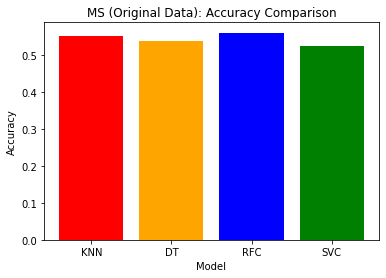

------------------------------------------------------------------------------------


Accuracy With KNN (PCA Data):  0.2971014492753623
F1 With KNN (PCA Data):  0.29046099935548336

Accuracy With Decision Tree (PCA Data):  0.3423913043478261
F1 With Decision Tree (PCA Data):  0.3424646226441254

Accuracy With Random Forest (PCA Data):  0.33695652173913043
F1 With Random Forest (PCA Data):  0.324840850426962

Accuracy With Support Vector Machines (PCA Data):  0.3134057971014493
F1 With Support Vector Machine (PCA Data):  0.2536595795539815


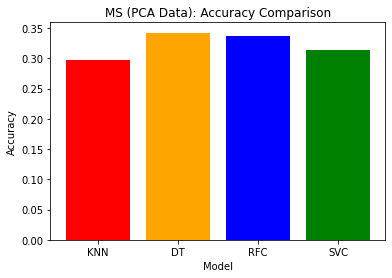

------------------------------------------------------------------------------------


Accuracy With KNN (Normalized Data):  0.552536231884058
F1 With KNN (Normalized Data):  0.5559805401629251

Accuracy With Decision Tree (Normalized Data):  0.5652173913043478
F1 With Decision Tree (Normalized Data):  0.5619437767629233

Accuracy With Random Forest (Normalized Data):  0.5543478260869565
F1 With Random Forest (Normalized Data):  0.5402733305798594

Accuracy With Support Vector Machines (Normalized Data):  0.5416666666666666
F1 With Support Vector Machine (Normalized Data):  0.5011507965734269


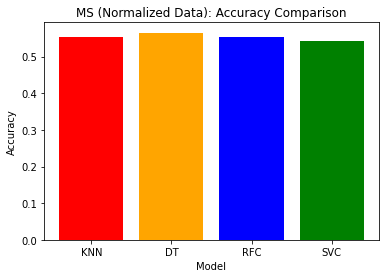

------------------------------------------------------------------------------------


CLASSIFICATION RESULT BY FEATURE:  IY_numerik

Accuracy With KNN (Original Data):  0.4927536231884058
F1 With KNN (Original Data):  0.4923927341231207

Accuracy With Decision Tree (Original Data):  0.4583333333333333
F1 With Decision Tree (Original Data):  0.4584752219671774

Accuracy With Random Forest (Original Data):  0.5036231884057971
F1 With Random Forest (Original Data):  0.5033806811329065

Accuracy With Support Vector Machines (Original Data):  0.46557971014492755
F1 With Support Vector Machine (Original Data):  0.41358468136356064


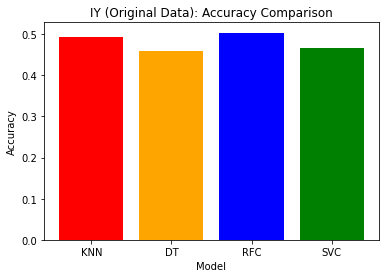

------------------------------------------------------------------------------------


Accuracy With KNN (PCA Data):  0.34782608695652173
F1 With KNN (PCA Data):  0.3341461873455803

Accuracy With Decision Tree (PCA Data):  0.36231884057971014
F1 With Decision Tree (PCA Data):  0.364269862930081

Accuracy With Random Forest (PCA Data):  0.358695652173913
F1 With Random Forest (PCA Data):  0.34391044682018407

Accuracy With Support Vector Machines (PCA Data):  0.391304347826087
F1 With Support Vector Machine (PCA Data):  0.264537012782775


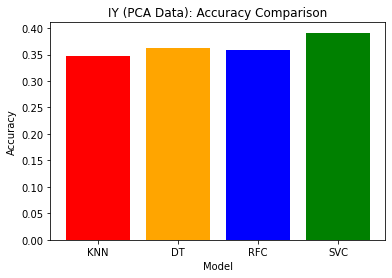

------------------------------------------------------------------------------------


Accuracy With KNN (Normalized Data):  0.5307971014492754
F1 With KNN (Normalized Data):  0.5307816091020915

Accuracy With Decision Tree (Normalized Data):  0.4673913043478261
F1 With Decision Tree (Normalized Data):  0.46762402859090857

Accuracy With Random Forest (Normalized Data):  0.48731884057971014
F1 With Random Forest (Normalized Data):  0.48679739064559374

Accuracy With Support Vector Machines (Normalized Data):  0.4746376811594203
F1 With Support Vector Machine (Normalized Data):  0.41869936026725996


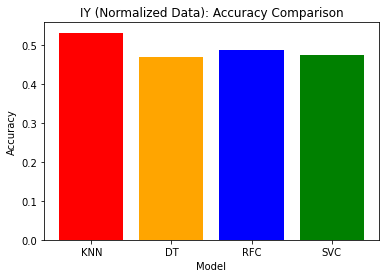

------------------------------------------------------------------------------------


CLASSIFICATION RESULT BY FEATURE:  KG_numerik

Accuracy With KNN (Original Data):  0.6105072463768116
F1 With KNN (Original Data):  0.6106931079304571

Accuracy With Decision Tree (Original Data):  0.5688405797101449
F1 With Decision Tree (Original Data):  0.5686244739530913

Accuracy With Random Forest (Original Data):  0.6141304347826086
F1 With Random Forest (Original Data):  0.6122409455713079

Accuracy With Support Vector Machines (Original Data):  0.5760869565217391
F1 With Support Vector Machine (Original Data):  0.5693034342203898


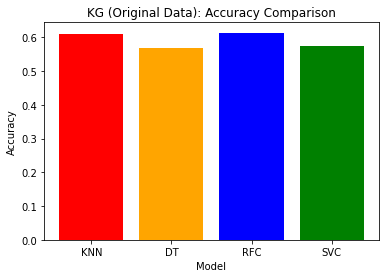

------------------------------------------------------------------------------------


Accuracy With KNN (PCA Data):  0.48731884057971014
F1 With KNN (PCA Data):  0.4828244138209943

Accuracy With Decision Tree (PCA Data):  0.5090579710144928
F1 With Decision Tree (PCA Data):  0.5080663328726719

Accuracy With Random Forest (PCA Data):  0.5181159420289855
F1 With Random Forest (PCA Data):  0.5002651820870325

Accuracy With Support Vector Machines (PCA Data):  0.4927536231884058
F1 With Support Vector Machine (PCA Data):  0.41728615816305864


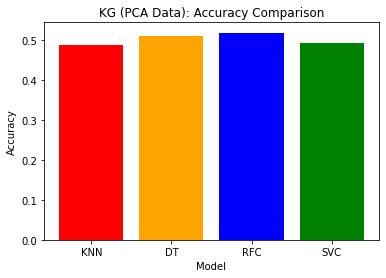

------------------------------------------------------------------------------------


Accuracy With KNN (Normalized Data):  0.6177536231884058
F1 With KNN (Normalized Data):  0.618096593779209

Accuracy With Decision Tree (Normalized Data):  0.572463768115942
F1 With Decision Tree (Normalized Data):  0.568870115915345

Accuracy With Random Forest (Normalized Data):  0.6123188405797102
F1 With Random Forest (Normalized Data):  0.6098426994720652

Accuracy With Support Vector Machines (Normalized Data):  0.5778985507246377
F1 With Support Vector Machine (Normalized Data):  0.572508720282899


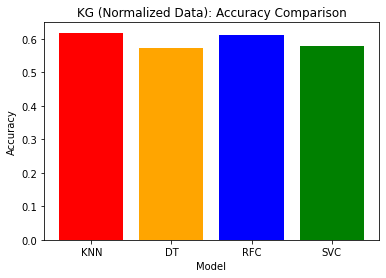

------------------------------------------------------------------------------------



In [32]:
# feature listesi tanimlanir ve train function calistirilir

feature_list = ['MS_numerik', 'IY_numerik', 'KG_numerik']

classify_by_feature(data, feature_list)